<span style='font-size: 2.5em'><b>São Paulo Housing 🏡</b></span><br/>


<span style='font-size: 1.5em'>Predicting housing prices in São Paulo's apartments for sale</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #1</b></span>



### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

#### Study Project

**Students**: Carlos Danilo Tomé e Lucas Galdino de Camargo

**Dataset**: https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

This data has about 13,000 apartments in São Paulo City, Brazil, available in Kaggle platform.

**Final Goal**: Predict housing prices for sale in São Paulo using machile learning models and techniques.

---

## 🎯 Notebook Goals

- 0. Imports, settings and data reading
- 1. Framing the problem
- 2. EDA and Data Cleanning
- 3. Modelling
- 4. Results

---

### 0. Imports, settings and read data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

import warnings
warnings.filterwarnings("ignore")


path='./datasets/sao-paulo-properties-april-2019.csv'
housing = pd.read_csv(path)

housing.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


## 🔲 1. Framing the Problem

### 📄 1.1. Context

**São Paulo** is the most populous city in Brazil. It's population in 2020 is around 12.4 million, acordding to IBGE [1]. 

It's also the largest economy in Brazil, which PIB in 2018 was R$ 2.210 Bi [2].

As any large economy, São Paulo has the real state market an important sector of it's economy, making possible the growth of digital companies in the sector as Airbnb and Quinto Andar, for example.

Given the importance of the sector, we'll challenge ourselves to make and analytical application in order to predict house prices for sale in São Paulo. To do so, we are making use of machine learning models and techniques, as we are learning and studying throughout our post-graduation at IFSP-SP.


**References:** <br/>
[1] https://cidades.ibge.gov.br/brasil/sp/sao-paulo/panorama

[2] https://www.ibge.gov.br/explica/pib.php

### 🧠 1.2. Challenge
Seu Barriga Housing is a well-established real estate company working on the housing market in São Paulo. 

They are facing a competitive market and they don't want to stay behing.

In order to deliver a better solution to its customers, they are willing to develop a machine learning application to predict house prices, pursuing faster deliveries as well as more precise price estimations.

#### 🎯 **Objective:**
**Build a machine learning solution to automatically predict the housing prices for _apartments_ in sale in São Paulo.** <br/>
These predictions will be used in Seu Barriga's new application service attending a better service to its customers.

#### **Baseline:**
Currently, the **housing prices** are estimated ***manually by experts***: a team gathers up-to-date information about an apartment and finds out the _housing price_. 
This is _costly_ and _time-consuming_, and their **estimates are not that great**; they often realize that **their estimates were off by more than 20%**.

#### **Solution Planning:**
- **Regression problem**
- Metrics:
    - R²
    - Root Mean Squared Error (RMSE)
- Data sources:
    - [São Paulo Real Estate Sale](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019)
- No assumptions were made
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

In [3]:
print('This dataset have', housing.shape[1],'columns and', housing.shape[0],
              'row about housing in São Paulo distributed in', len(set(housing.District)), 'districts.\n')
housing.info()

This dataset have 16 columns and 13640 row about housing in São Paulo distributed in 96 districts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  

### 1.3 Data Structure

Each row corresponds to an apartment with **15 attributes**  and it's price. There are 8 numeric attributes  and 7 categorical, as described below: <br/>


* **Price:** Final price advertised (RS Brazilian Real). Column Type: Int64.

* **Condo:** Condominium expenses (unknown values are marked as zero). Column Type: Int64.     

* **Size:**  The property size in Square Meters m² (private areas only). Column Type: Int64. 

* **Rooms:** Number of bedrooms. Column Type: Int64.   

* **Toilets:** Number of toilets (all toilets). Column Type: Int64.     

* **Suites:** Number of bedrooms with a private bathroom (en suite). Column Type: Int64.  

* **Parking:** Number of parking spots. Column Type: Int64.       

* **Elevator:** Binary value: 1 if there is elevator in the building, 0 otherwise. Column Type: Int64. 

* **Furnished:** Binary value: 1 if the property is funished, 0 otherwise. Column Type: Int64.   

* **Swimming Pool:** Binary value: 1 if the property has swimming pool, 0 otherwise. Column Type: Int64.    

* **New:** Binary value: 1 if the property is very recent, 0 otherwise. Column Type: Int64.  

* **District:**  The neighborhood and city where the property is located, e.i: Itaim Bibi/São Paulo. 

* **Negotiation Type:**  Type of negotiation of housing. Column Type: String.
     * rent
     * sale 

* **Property Type:** Type of housing, in this feature we only have one kind of housing: 'apartment'. Column Type: String.   

* **Latitude:**  Geographic location. Column Type: Geocode.         

* **Longitude:** Geographic location. Column Type: Geocode. 

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [5]:
housing.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


## 🧹 2. EDA and Data Cleanning

### 2.1 Checking for duplicated samples

In [6]:
housing[housing.duplicated()].head(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
165,1300,387,50,2,2,1,1,0,0,0,0,Cidade Tiradentes/São Paulo,rent,apartment,-23.582576,-46.417478
203,999,0,70,2,2,1,1,0,0,0,0,Ermelino Matarazzo/São Paulo,rent,apartment,-23.494694,-46.478125
204,888,0,70,2,2,1,1,0,0,0,0,Ermelino Matarazzo/São Paulo,rent,apartment,-23.494694,-46.478125
207,8000,1400,132,3,2,1,1,0,0,0,0,Iguatemi/São Paulo,rent,apartment,-23.585672,-46.681216
208,8000,1400,132,3,2,1,1,0,0,0,0,Iguatemi/São Paulo,rent,apartment,-23.585672,-46.681216


**There are 319 duplicated data**, so we will drop duplicated data by keeping the first sample in the dataset.

### 2.2 Checking Negotiation Type

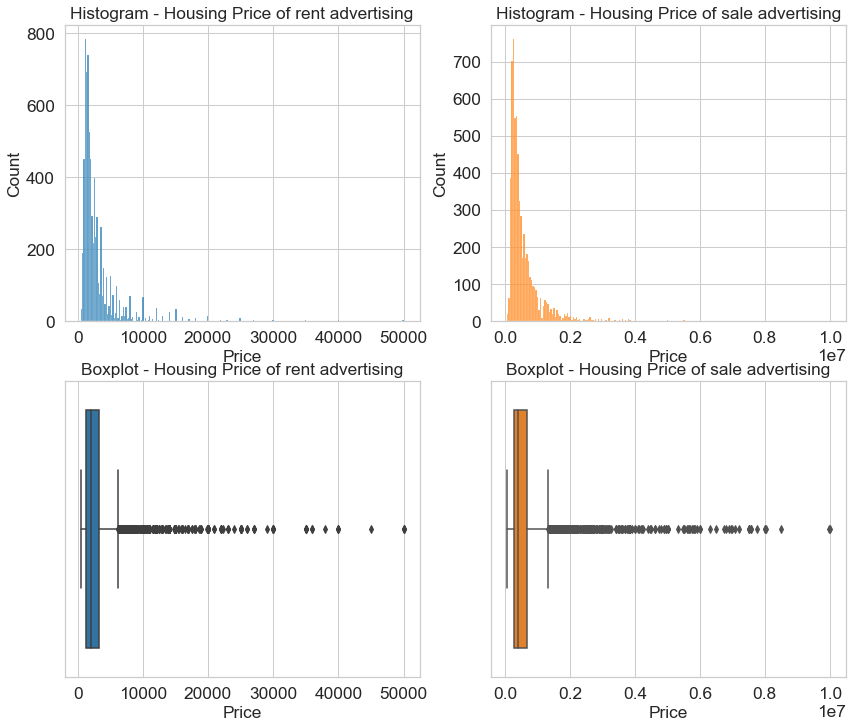

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14,12))

sns.histplot(x="Price", data=housing[housing['Negotiation Type'] == 'rent'],  ax=axes[0, 0], color = 'tab:blue')
axes[0, 0].set_title('Histogram - Housing Price of rent advertising')

sns.histplot(x="Price", data=housing[housing['Negotiation Type'] == 'sale'],  ax=axes[0, 1], color = 'tab:orange')
axes[0, 1].set_title('Histogram - Housing Price of sale advertising')

sns.boxplot( x="Price", data=housing[housing['Negotiation Type'] == 'rent'],  ax=axes[1, 0], color = 'tab:blue')
axes[1, 0].set_title('Boxplot - Housing Price of rent advertising')

sns.boxplot( x="Price", data=housing[housing['Negotiation Type'] == 'sale'],  ax=axes[1, 1], color = 'tab:orange')
axes[1, 1].set_title('Boxplot - Housing Price of sale advertising');

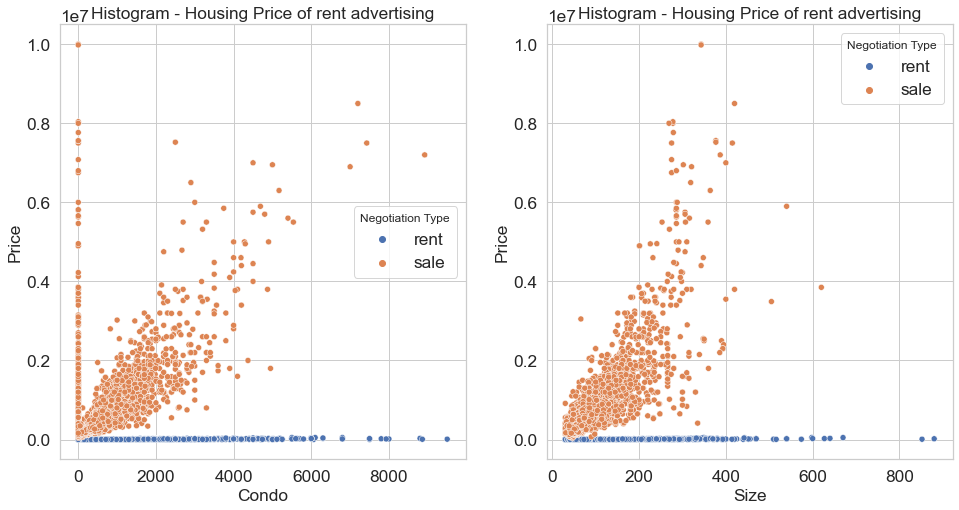

In [8]:
##### HUE of negotion type
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(y="Price",x='Condo', data=housing, hue ='Negotiation Type',  ax=axes[0], color = 'tab:blue')
axes[0].set_title('Histogram - Housing Price of rent advertising')

sns.scatterplot(y="Price",x='Size', data=housing,hue ='Negotiation Type',  ax=axes[1], color = 'tab:orange')
axes[1].set_title('Histogram - Housing Price of rent advertising');

### 2.3 Dropping Property Type

We are dropping the column "Property Type" because all instances have the same value in this feature: 'apartment'.

In [9]:
set(housing['Property Type'])

{'apartment'}

### Applying Data Cleanning

In [10]:
# Set only sale Negotiation Type
housing = housing[housing['Negotiation Type']=='sale']

# Drop duplicated data
housing.drop_duplicates(keep='first', inplace=True)

# Drop columns
housing.drop(['Negotiation Type', 'Property Type'], axis=1, inplace=True)

### 2.4 Geolocation with inconsistent values

São Paulo's coordinates are [3]:

    -Latitude: -23.5489, 
    -Longitude: -46.6388, 

Let's check on how many records are distant from a range centered at this point.

[3] https://pt.db-city.com/Brasil--S%C3%A3o-Paulo--S%C3%A3o-Paulo

In [11]:
min_y= -23.8
max_y= -23.2
min_x= -46.95
max_x= -46

housing[ (housing['Latitude'] < min_y )   |
         (housing['Longitude'] < min_x )  |
         (housing['Latitude']  > max_y )  |
         (housing['Longitude'] > max_x )  ].shape

(468, 14)

Ok, so we have 468 records that are outliers.

What we are going to do is to replace this outliers by null, and later we'll fill this fields with the meaan latitude and longitude of its district.

In [12]:
# Replace outlier coodinates as NaN

housing['Latitude'][(housing['Latitude'] < min_y )  |
                   (housing['Longitude'] < min_x )  |
                   (housing['Latitude']  > max_y )  |
                   (housing['Longitude'] > max_x )  
                   ]= np.nan

housing['Longitude'][(housing['Latitude'] < min_y ) |
                   (housing['Longitude'] < min_x )  |
                   (housing['Latitude']  > max_y )  |
                   (housing['Longitude'] > max_x )  
                   ]= np.nan

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


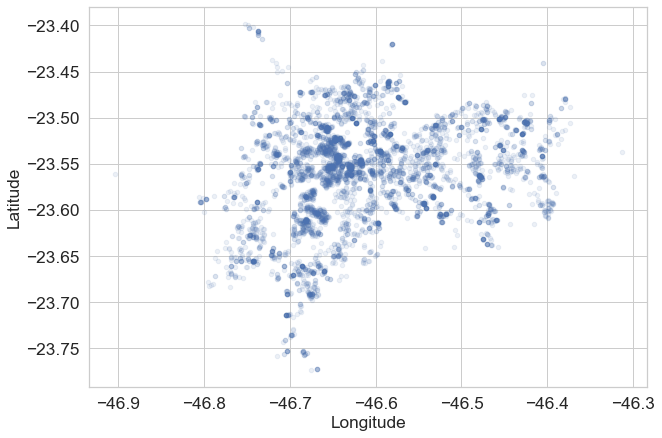

In [13]:
# Plot view
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(10, 7));

### 2.5 District Information

As we've seen before, there are some data with missing or outlier values on Latitude and Longitude fields.
To deal with that we are first replacing these for nan, and then we will use the mean coordinates of it's district to replace the null cases.

Another thing we will do is about the districts, because there there are many of them, and we don't want to face any problem with dimensionality, but we don't want to miss information about the district of a given apartment as well.
What we are going to do is to divide all of São Paulo's districts into 4 hierarchical classes based on the mean price of the square meter in the districts, and use this variable insted of the district itself.

In [14]:
# String Replace
# Let's drop '/São Paulo' from the District column of all records in the dataframe
housing['District'] = housing['District'].str.partition('/', expand=True)[0]

In [15]:
district = housing.groupby(['District']).apply(lambda x: pd.Series(dict(
                                                        qtd_housing          = ((x.Price.count()))
                                                        ,mean_housing_price   =  ((x.Price.mean())) 
                                                        ,mean_housing_size    =  ((x.Size.mean()))
                                                        ,mean_Price_per_square_meter =  ((x.Price.sum()))/((x.Size.sum()))
                                                        ,mean_housing_condo   =  ((x.Condo.mean()))
                                                        ,pct_new_housing      = ((x.New.sum())*100/(x.Price.count()))
                                                        ,Latitude_district    =  ((x.Latitude.mean())) 
                                                        ,Longitude_district   =  ((x.Longitude.mean()))
))).reset_index() 

district.describe()

,qtd_housing,mean_housing_price,mean_housing_size,mean_Price_per_square_meter,mean_housing_condo,pct_new_housing,Latitude_district,Longitude_district
count,96.000000,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,65.645833,5.910070e+05,77.202925,6824.828713,501.800971,3.514141,-23.562124,-46.615282
std,31.510392,5.231580e+05,28.047319,2915.180949,331.422675,4.184987,0.061478,0.097906
min,20.000000,1.132876e+05,42.380952,2441.542385,83.600000,0.000000,-23.755602,-46.781714
25%,36.750000,2.669636e+05,56.876881,4838.500424,284.803634,0.000000,-23.597966,-46.685800
50%,60.000000,4.393000e+05,67.982017,6432.467197,402.434453,2.429190,-23.554698,-46.635571
75%,83.250000,6.653540e+05,90.530068,7419.272801,622.505782,5.015823,-23.521128,-46.537567
max,149.000000,3.665528e+06,177.150000,20691.663280,1754.454545,19.354839,-23.405570,-46.396093


In [16]:
# Let's take a look at the 15 districts with the highest price per square meter in São Paulo
district.reset_index(drop = True, inplace=False).sort_values(['mean_Price_per_square_meter'], ascending = [False])[:15].\
                            style.background_gradient(cmap='Oranges', axis =0)

,District,qtd_housing,mean_housing_price,mean_housing_size,mean_Price_per_square_meter,mean_housing_condo,pct_new_housing,Latitude_district,Longitude_district
31,Iguatemi,20.000000,3665528.150000,177.150000,20691.663280,467.650000,0.000000,-23.585596,-46.681983
92,Vila Olimpia,39.000000,1642422.897436,105.358974,15588.827695,716.461538,0.000000,-23.598507,-46.679572
33,Itaim Bibi,76.000000,1858340.802632,129.710526,14326.831102,1675.500000,0.000000,-23.584074,-46.676550
0,Alto de Pinheiros,97.000000,2455076.072165,174.237113,14090.431276,1419.391753,1.030928,-23.546908,-46.710279
51,Moema,130.000000,1625676.615385,126.076923,12894.323368,1424.838462,0.769231,-23.604763,-46.664257
88,Vila Madalena,41.000000,1235416.195122,100.804878,12255.519961,816.634146,4.878049,-23.550483,-46.692531
40,Jardim Paulista,77.000000,1802961.038961,147.129870,12254.214847,1754.454545,1.298701,-23.568660,-46.658574
60,Pinheiros,92.000000,919763.543478,80.913043,11367.308705,714.304348,3.260870,-23.559736,-46.682808
9,Brooklin,137.000000,1320799.671533,121.671533,10855.453537,1033.664234,1.459854,-23.613113,-46.684808
90,Vila Mariana,43.000000,1090539.139535,100.511628,10849.880379,862.860465,2.325581,-23.588442,-46.635963


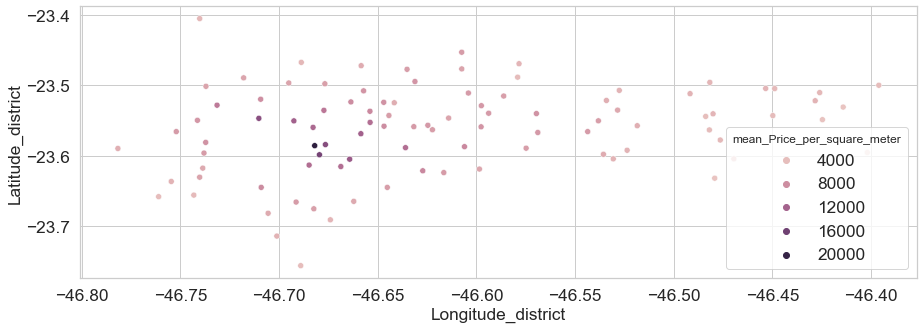

In [17]:
# Plot view
sns.scatterplot(data = district , x="Longitude_district", y="Latitude_district",  hue='mean_Price_per_square_meter');

In [18]:
# Creating a price rate considering the mean price per square meter into 4 labels with hierarchical values
district['district_rate'] = pd.qcut(district['mean_Price_per_square_meter'], q=4,   labels=[1, 2, 3, 4])

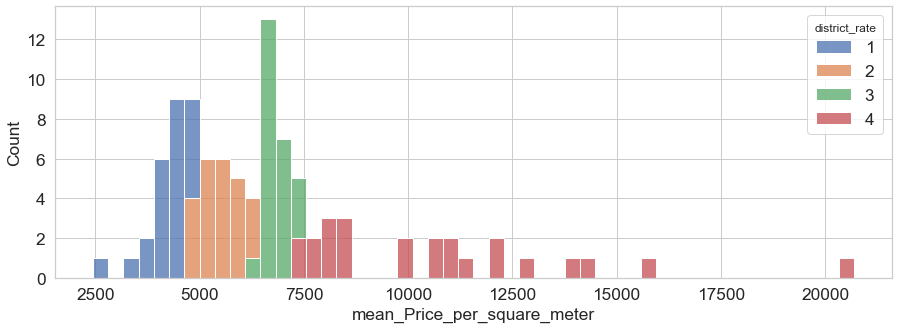

In [19]:
sns.histplot(x="mean_Price_per_square_meter", data=district, color = 'tab:blue', bins =50,hue="district_rate", multiple="stack");

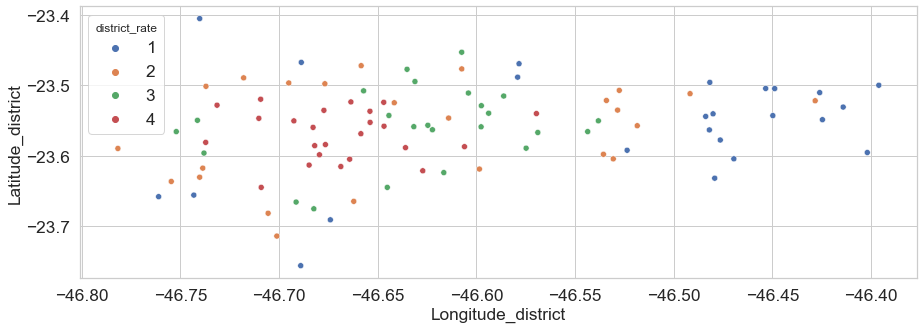

In [20]:
sns.scatterplot(data = district , x="Longitude_district", y="Latitude_district",  hue='district_rate');

#### Saving District information

In [22]:
district.to_csv('./datasets/district_information.csv', sep=';',index=False)

### 2.6 Integer variables

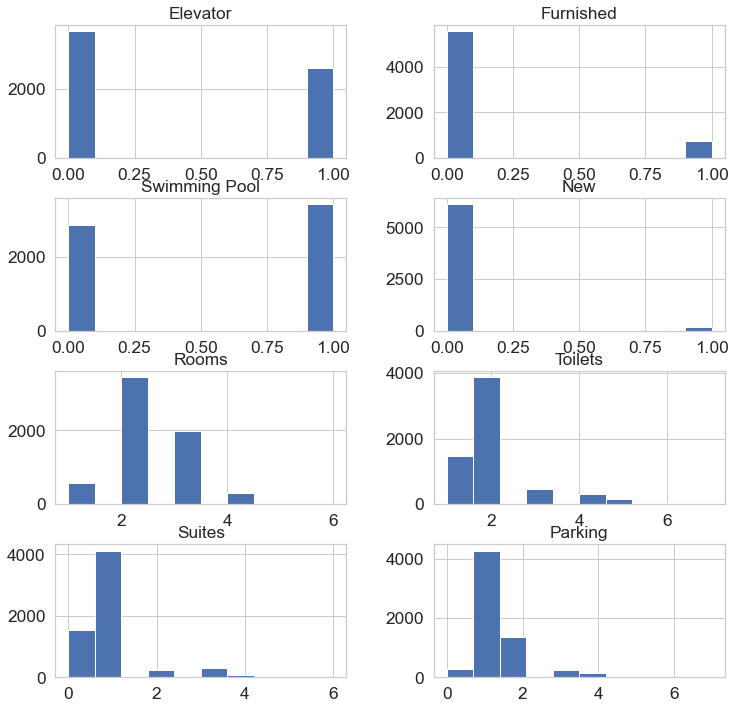

In [23]:
##### Integer variables - Count values
housing.hist(column=['Elevator', 'Furnished', 'Swimming Pool', 'New','Rooms', 'Toilets', 'Suites', 'Parking']
             , figsize=(12,12), layout = (4,2));

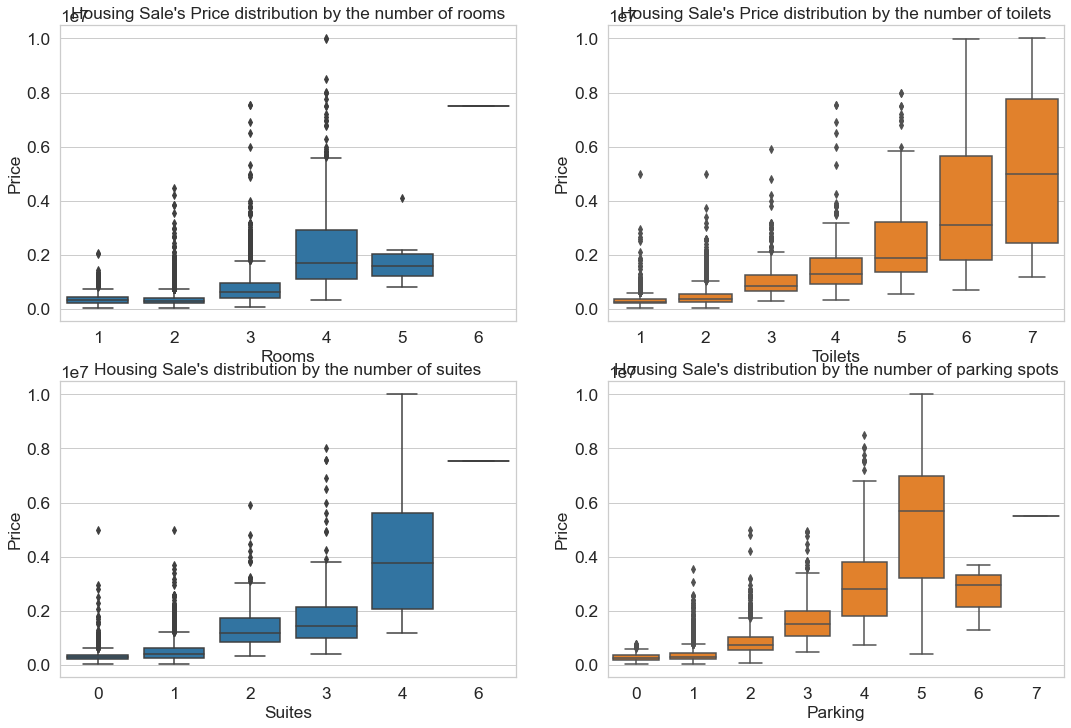

In [24]:
##### Integer Variabels - Boxplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.boxplot(y="Price",x= 'Rooms',data=housing,  ax=axes[0, 0], color = 'tab:blue')
axes[0, 0].set_title("Housing Sale's Price distribution by the number of rooms")

sns.boxplot(y="Price",x= 'Toilets', data=housing,  ax=axes[0, 1], color = 'tab:orange')
axes[0, 1].set_title("Housing Sale's Price distribution by the number of toilets")

sns.boxplot( y="Price",x= 'Suites',data=housing,  ax=axes[1, 0], color = 'tab:blue')
axes[1, 0].set_title("Housing Sale's distribution by the number of suites")

sns.boxplot( y="Price",x= 'Parking', data=housing,  ax=axes[1, 1], color = 'tab:orange')
axes[1, 1].set_title("Housing Sale's distribution by the number of parking spots");

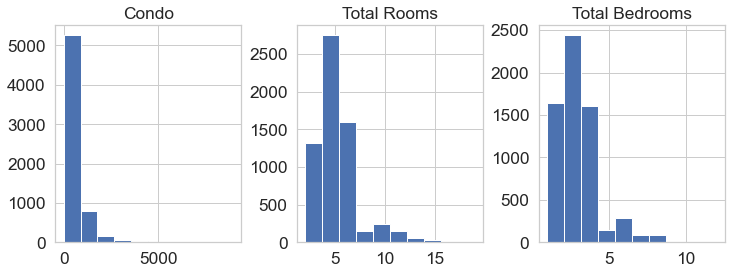

In [25]:
# Let's Create some interesting variables to use when modelling
housing_temp = housing.copy()

housing_temp['Total Rooms']            = housing['Rooms'] + housing['Toilets'] + housing['Suites']
housing_temp['Total Bedrooms']         = housing['Rooms'] + housing['Suites']

housing_temp.hist(column=['Condo','Total Rooms', 'Total Bedrooms'], figsize=(12,4),layout=(1,3));

In [26]:
##### Correlation of the variables with the Sale's Price
housing.corr()[['Price']].sort_values(by=['Price'] ,ascending = False)[1:].style.background_gradient(cmap='Greens', axis =0)

,Price
Size,0.825274
Parking,0.701932
Toilets,0.636359
Suites,0.623361
Condo,0.612669
Rooms,0.489961
Swimming Pool,0.176873
Elevator,0.065884
Furnished,0.060261
New,-0.039658


### 2.7 Splitting the data into train and test sets 

Well, at this point we've done pretty much of the basics data treatment we need, created some new variables to use in modelling as well as we've known this dataset a little better. For now we'll divide our dataset into train and test, by stratifying the samples considering the District, so we don't miss any District when training.

In [27]:
# Splitting the data between train and test
housing_train, housing_test = train_test_split(housing, test_size=0.2, stratify=housing['District'], random_state=42)

In [28]:
# Saving the data after split
housing_train.to_csv('./datasets/housing_train.csv', sep=';',index=False)
housing_test.to_csv('./datasets/housing_test.csv', sep=';',index=False)

### 2.8 Checking samples with missing samples     

In [29]:
housing.isnull().sum()

Price              0
Condo              0
Size               0
Rooms              0
Toilets            0
Suites             0
Parking            0
Elevator           0
Furnished          0
Swimming Pool      0
New                0
District           0
Latitude         468
Longitude        466
dtype: int64

## 🤖 3. Modelling

From now one things start to get funnier, its time to model!

To solve our regression problem we've tried the following models:

    
**Random Forest Regressor**: In order to find best parameters we've set 90 total fits in the Grid Search, changing the parameters :  min_samples leaf, min_samples_split and n_estimators.
            
**Support Vector Regressor**: In this case we also have set 90 different sets in the Grid Search, by changing the parameters: kernel, degree, epsilon and C.
            
**Ridge Linear Model**: In this case, as this model is really simple and fast to run, we've set 400 total fits in the Grid Search, by changing the parameters: alpha, solver, fit_intercept and normalize.
            
**Lasso Linear Model**: For this one, we've set 80 total fits in the Grid Search, by changing the parameters: alpha, fit_intercept and normalize.
            
**Gradient Boost Regressor**: In this case, we've set 480 total fits for Grid Search, by changing the parameters: subsample, n_estimators, learning_rate and criterion.
            
**K Neighbors Regressor**: For this model, we've set 90 total fits for Grid Search, when changing only the parameters: n_neighbors, weights and p.
    
**Bayesian Ridge**: In this particular case we've set only 15 different fits for Grid Search, only changing the n_iter parameter.
            
**Ada Boost Regressor**: For this model, we've set 120 total fits for Grid Search, by changing the parameters: base_estimator, n_estimators, learning_rate and loss.
    

At the end, we've trained over this project over than **1300** different versions of machine learning models!

For your sake, in this particular notebook we'll keep just 2 models: Random Forest Regressor and Ada Boost Regressor, our champion models.

If you want to see more about any other model that we've tried, please take a look at the sprint 3 of this project.

In [30]:
# Importing our Train set and splitting it into features (X_train) and target (y_train)

# Loading trainning data
housing_train = pd.read_csv('./datasets/housing_train.csv', sep=';')

X_train = housing_train.drop(['Price'], axis=1).copy()
y_train = housing_train['Price'].copy()


# Importing Test set and split it into features (X_train) and target (y_train)

# Loading testing data
housing_test = pd.read_csv('./datasets/housing_test.csv', sep=';')

X_test = housing_test.drop(['Price'], axis=1).copy()
y_test = housing_test['Price'].copy()

### 3.1 Creating a Column Transformer

In order to build a full pipeline to our models, we'll create a class to deal with all the data preprocessing and transforming we'll need.

In [38]:
class pre_processing_transform(BaseEstimator, TransformerMixin):
    
    # class that creates the new variables
    # class that deals with the outliers in the coordinates
    # class that substitutes the District by its created hierarchical class considering its mean price per square meter
    # Goal: customized transformator to consider in the pipeline as well as adapted to sklearn
    # notes: with this configuration this class is able to do "fit", "transform" and "fit_transform", natives on sklearn
    
    def __init__(self):
        return None
    
    def fit(self,X,y = None):
        return self
    
    def transform(self, X, y = None):
        
        temp = X.copy()
        
        # Create new features
        temp['Total Rooms']            = temp['Rooms'] + temp['Toilets'] + temp['Suites']
        temp['Total Bedrooms']         = temp['Rooms'] + temp['Suites']
        
        # Add District Rate
        district = pd.read_csv('./datasets/district_information.csv', sep=';')
        
        temp = pd.merge(temp, district[['District','district_rate','Latitude_district','Longitude_district']],
                           how='left', on=['District'])

        # Drop object Column District   
        temp.drop(['District'], axis=1, inplace=True)

        min_y= -23.8
        max_y= -23.2
        min_x= -46.95
        max_x= -46        
             
        # Remove outliers and replace as NAN
        temp['Latitude'][(temp['Latitude'] < min_y )  |
                   (temp['Longitude'] < min_x )  |
                   (temp['Latitude']  > max_y )  |
                   (temp['Longitude'] > max_x )  
                   ]= np.nan

        temp['Longitude'][(temp['Latitude'] < min_y ) |
                           (temp['Longitude'] < min_x )  |
                           (temp['Latitude']  > max_y )  |
                           (temp['Longitude'] > max_x )  
                           ]= np.nan
        
        # Input into the NA values the mean point of the considered neigborhood
        temp.Latitude = np.where(temp.Latitude.isnull()
                                  , temp.Latitude_district # If Latitude is null replace with Latitude_district
                                  , temp.Latitude # else, keep the original value
                                 )
        temp.Longitude = np.where(temp.Longitude.isnull()
                                          , temp.Longitude_district # If Longitude is null replace with Longitude_district
                                          , temp.Longitude # else, keep the original value
                                         )

        # Drop temporary Columns
        temp.drop(['Latitude_district', 'Longitude_district'], axis=1, inplace=True)
        
        return temp

In [39]:
pipeline = Pipeline([
        
    #Data preprocessing
    ('Criando as colunas', pre_processing_transform()),
    
    # Scaling our data with StandardScaler
    ('escalonando', StandardScaler())
])

In [40]:
# Fit and Apply the Pipeline
housing_train_transformed = pipeline.fit_transform(X_train)

In [41]:
# Saving Pipeline
joblib.dump(pipeline, './preprocessed_pipeline.pkl')

['./preprocessed_pipeline.pkl']

### 3.2 Metrics

The metrics we are using to evaluate our regression problems are R² and RMSE:

##### **Coefficient of Determination - R²**

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=0}^{m-1}(y^{(i)}-\bar{y})^2}$$

##### **Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=0}^{m-1}(y^{(i)}-\hat{y}^{(i)})^2}{m}}$$


In order to complete our pipeline, we'll build a function to:

    - Load our preprocessed pipeline;
    - Set the Grid Search to our cross validation;
    - Fit the data;
    - Compute the metrics (R² and RMSE) to evaluate the models as well as the residuals;
    - Plot some graphics to examinate the models predictions and residuals;
    - Returns the best model as well as the predictions and residuals both for train and test samples.

In [42]:
# Function to evaluate the regression models we'll test
# Metrics to evaluate the models:
# R²: for its easy interpretability
# RSME: Because its based on root square mean errors and its measure is in the same dimension as the target (Price) 

def resultados_regressao(modelo, string_nome_modelo, parametros):

    # Load a pre processed pipeline
    loaded_preprocessed_pipeline = joblib.load('./preprocessed_pipeline.pkl')
    
    # Create a full pipeline
    full_pipeline = Pipeline([
            ('preprocessing', loaded_preprocessed_pipeline),
            (string_nome_modelo, modelo)
    ])


    # GridSearch with 5 folds
    grid = GridSearchCV(full_pipeline,parametros,cv=5, scoring = 'neg_mean_squared_error', return_train_score=True, verbose=1)

    # Trainning the model
    grid.fit(X_train, y_train)

    # Best model in the grid search
    best_model = grid.best_estimator_

    print('Melhores parametros encontrados: \n',grid.best_params_)  
    
    # Print the mediam RSME of all folds for the model with the best hiperparameters
    n_folds = 5
    split_keys = [f'split{i}_test_score' for i in range(n_folds)]
    best_index = grid.best_index_

    rmse_scores = []

    for key in split_keys:
        neg_mse_score = grid.cv_results_[key][best_index]
        rmse_scores.append(np.sqrt(-neg_mse_score))

    best_rmse = np.mean(rmse_scores)
    best_rmse_std = np.std(rmse_scores)


    print(f'Best RMSE score of all folds IN TRAIN: {best_rmse} +- {best_rmse_std}')
    
    
    # 1 - Getting the predictions
    y_train_pred = best_model.predict(X_train)
    
    y_teste_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_teste_pred)
    
    print(f'Best R² score of all folds IN TRAIN: {r2}')
    
    
    # 2 - Getting the residuals
    residual = y_train_pred - y_train
    
    residual_test =  y_teste_pred - y_test
    

    fig, axes = plt.subplots(3, 2, figsize=(18,14))

    sns.scatterplot(x=y_train_pred, y=y_train, ax=axes[0, 0], color = 'tab:blue')
    axes[0, 0].set_title('Housing value - Prediction vs Real - Regression (train)')

    sns.scatterplot(x=y_train_pred, y=residual, ax=axes[0, 1], color = 'tab:blue')
    axes[0, 1].set_title('Housing value - Real vs Residual - Regression (train)')


    sns.scatterplot(x=y_teste_pred, y=y_test, ax=axes[1, 0], color = 'tab:orange')
    axes[1, 0].set_title('Housing value - Prediction vs Real - Regression (test)')

    sns.scatterplot(x=y_teste_pred, y=residual_test,  ax=axes[1, 1], color = 'tab:orange')
    axes[1, 1].set_title('Housing value - Real vs Residual - Regression (test)')


    sns.boxplot(y=residual, ax=axes[2, 0], color= 'tab:blue')
    axes[2, 0].set_title('Boxplot - Residual (train)')

    sns.boxplot(y=residual_test, ax=axes[2, 1], color= 'tab:orange')
    axes[2, 1].set_title('Boxplot - Residual (test)')
    
    return best_model, y_train_pred, y_teste_pred, residual, residual_test;

#### 3.3 Random Forest Regressor

In [43]:
modelo_2 = RandomForestRegressor()

string_nome_modelo = 'random_forest'

parametros = [{string_nome_modelo+'__min_samples_leaf':[3,8],
              string_nome_modelo+'__min_samples_split':[10,50,80],
              string_nome_modelo+'__n_estimators':[100,250,500],
              string_nome_modelo+'__random_state': [42]
}]

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  7.1min finished


Melhores parametros encontrados: 
 {'random_forest__min_samples_leaf': 3, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 500, 'random_forest__random_state': 42}
Best RMSE score of all folds IN TRAIN: 232099.76194723323 +- 55915.35847917478
Best R² score of all folds IN TRAIN: 0.960345968761729


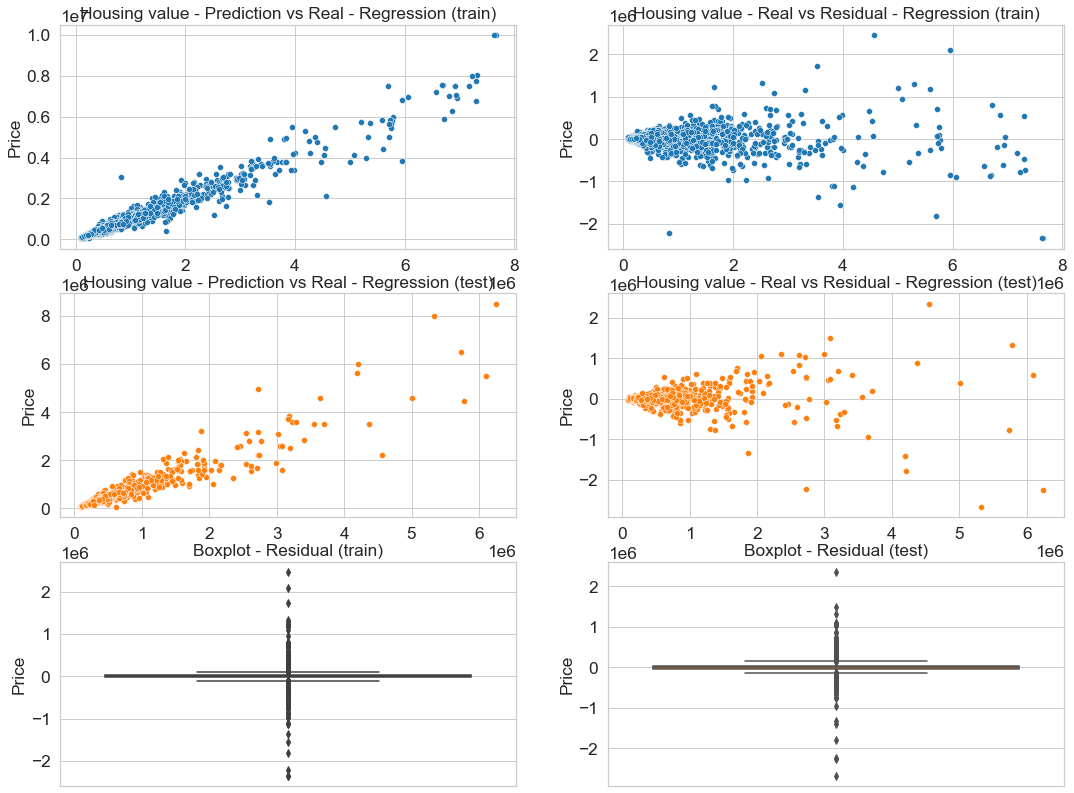

In [44]:
best_model_2, y_train_pred_2, \
    y_test_pred_2, residual_2, residual_test_2 = resultados_regressao(modelo_2, string_nome_modelo, parametros)

In [86]:
r2 = r2_score(y_test, y_test_pred_2)
    
print(f'R² score IN TEST: {r2}')

rmse_test = mean_squared_error(y_test, y_test_pred_2, squared=False)

print(f'RMSE IN TEST: {rmse_test}')

R² score IN TEST: 0.8918560483334098
RMSE IN TEST: 230836.93828215438


In [385]:
# Saving Best Random Forest regression model
joblib.dump(best_model_2, './best_random_forest.pkl')

['./best_random_forest.pkl']

#### 3.4 Ada Boost Regressor

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parametros encontrados: 
 {'AdaBoostRegressor__base_estimator': RandomForestRegressor(), 'AdaBoostRegressor__learning_rate': 0.5, 'AdaBoostRegressor__loss': 'square', 'AdaBoostRegressor__n_estimators': 50, 'AdaBoostRegressor__random_state': 0}
Best RMSE score of all folds IN TRAIN: 210084.01735798438 +- 52632.540024527516
Best R² score of all folds IN TRAIN: 0.9965537339094199


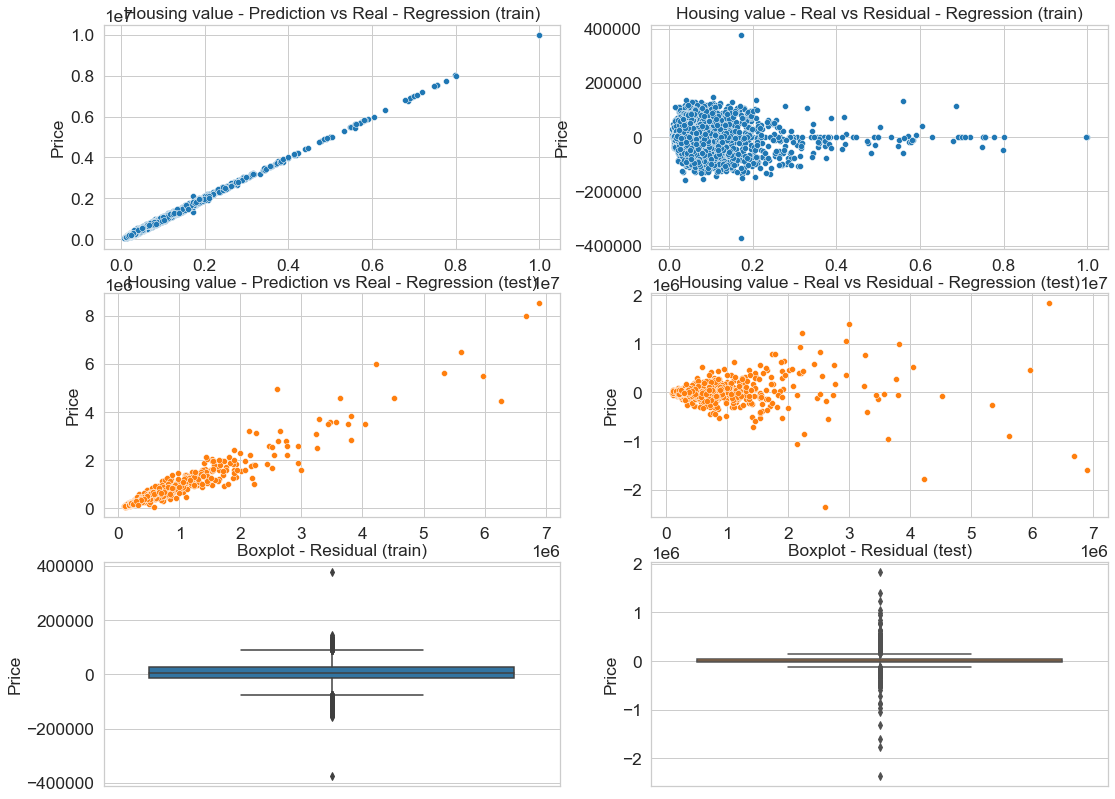

In [375]:
modelo_3 = AdaBoostRegressor()

string_nome_modelo = 'AdaBoostRegressor'

parametros = [{
    
    string_nome_modelo+'__base_estimator': [DecisionTreeRegressor(max_depth = 10), RandomForestRegressor()] , 
    string_nome_modelo+'__random_state': [0],
    string_nome_modelo+'__n_estimators': [50,100] ,
    string_nome_modelo+'__learning_rate': [0.5,1,5] ,
    string_nome_modelo+'__loss': ['linear','square']
}]

best_model_3 , y_train_pred_3, \
    y_test_pred_3, residual_3, residual_test_3= resultados_regressao(modelo_3, string_nome_modelo, parametros)

In [91]:
r2 = r2_score(y_test, y_test_pred_3)
    
print(f'R² score IN TEST: {r2}')

rmse_test = mean_squared_error(y_test, y_test_pred_3, squared=False)

print(f'RMSE IN TEST: {rmse_test}')

R² score IN TEST: 0.921668444159161
RMSE IN TEST: 196459.28730981928


In [386]:
# Saving Best Ada Boost regression model
joblib.dump(best_model_3, './best_adaboost.pkl')

['./best_adaboost.pkl']

## 🔍 4. Results

Finally, let's check on the results we've got to solve this regression problem.

### 4.1 Baseline

Before talking about any results, let's set our baseline.

Let's remind that currently, the **housing prices** at Seu Barriga are estimated ***manually by experts***: a team gathers up-to-date information about an apartment and finds out the _housing price_. 
This is _costly_ and _time-consuming_, and their **estimates are not that great**; they often realize that **their estimates were off by more than 20%**.

In order to set this baseline, let's get random numbers from 20% to 25%.

In [94]:
np.random.seed(42)

y_train_pred_baseline = []

for housing_price in y_train:
    percent_error = 1 + np.random.randint(20, 26) / 100
    y_train_pred_baseline.append(housing_price * percent_error)    
    
r2 = r2_score(y_train, y_train_pred_baseline)
print(f'R² score Baseline IN TRAIN: {r2}')

baseline_rmse_train = mean_squared_error(y_train, y_train_pred_baseline, squared=False)
print(f'RMSE Baseline IN TRAIN: {baseline_rmse_train}')    

y_test_pred_baseline = []

for housing_price in y_test:
    percent_error = 1 + np.random.randint(20, 26) / 100
    y_test_pred_baseline.append(housing_price * percent_error)

r2 = r2_score(y_test, y_test_pred_baseline)
print(f'R² score Baseline IN TEST: {r2}')

baseline_rmse_test = mean_squared_error(y_test, y_test_pred_baseline, squared=False)
print(f'RMSE Baseline IN TEST: {baseline_rmse_test}')

R² score Baseline IN TRAIN: 0.9160855279682489
RMSE Baseline IN TRAIN: 218747.9653024047
R² score Baseline IN TEST: 0.9118304280909618
RMSE Baseline IN TEST: 208431.59597793903


### 4.2 Discusion and results

As we've said before, we've trained many different models to solve this problem. 

Above we've a table with the mean of the **RMSE** in the 5 folds we've set for cross validation, considering the best parameters found in the Grid Search, for each model, in descending order.


| MODEL | RMSE |
| ----- | ---- | 
| Ada Boost Regressor | 210.084 |
| Gradient Boost Regressor | 229.465 |
| Random Forest Regressor | 232.099 |
| K Neighbors Regressor | 322.068 | 
| Ridge Linear Model | 382.405 |
| Bayesian Ridge | 382.428 |  
| Lasso Linear Model | 388.374 |
| Support Vector Regressor | 640.521 |


From now one, we have chosen the **Ada Boost Regressor** and the **Random Forest Regressor** to look foward into the residual analysis.


Above we've two tables with the metrics in Train and Test set, considering the baseline:

TRAIN 

| MODEL | RMSE | R² | 
| ----- | ---------- | --------- |
| Baseline - Analysts Price | 218.748 | 0.916 |
| Ada Boost Regressor | 210.084 | 0.997 |
| Random Forest Regressor | 232.010 | 0.960 |



TEST

| MODEL | RMSE | R² | 
| ----- | ---------- | --------- |
| Baseline - Analysts Price | 208.432 | 0.912 |
| Ada Boost Regressor | 196.459 | 0.922 |
| Random Forest Regressor | 230.837 | 0.892 |


As we can see, our champion model should be **Ada Boost Regressor**, given it is the model we've achieved the best metrics performances. 

**Also, we've achieved better results than the standard baseline the company has actually**.

For Ada Boost Regressor, we've done the Grid Search on the space described bellow:
   - base_estimator: [DecisionTreeRegressor(max_depth = 10), RandomForestRegressor()]
   - n_estimators: [50,100]
   - learning_rate: [0.5,1,5]
   - loss: ['linear','square']
   
In this case, the best combination of parameters were:
   - base_estimator: RandomForestRegressor()
   - n_estimators: 50
   - learning_rate: 0.5
   - loss: square

### 4.3 Residual and Percent Error Analysis

#### 4.3.1 Random Forest

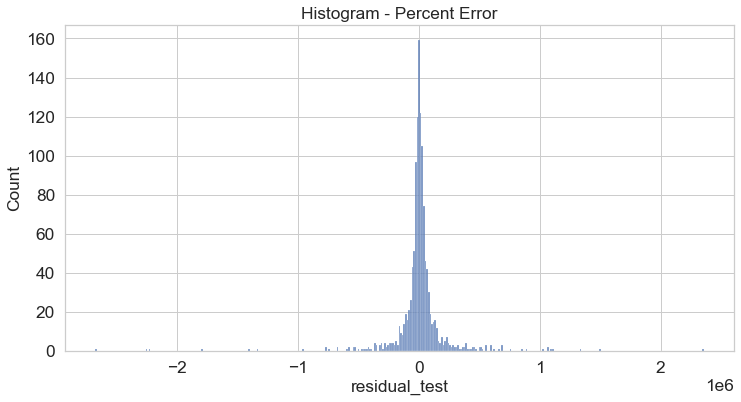

In [376]:
# Create a dataframe to evaluate the predict

results_test_2 = pd.DataFrame({'residual_test':residual_test_2, 'y_test':y_test,'y_teste_pred':y_test_pred_2   })

results_test_2['percent_error'] = (results_test_2['residual_test'] /results_test_2['y_test']) * 100

results_test_2 = pd.concat([X_test[['District', 'Latitude', 'Longitude']], results_test_2], axis=1)

fig = plt.subplots(figsize=(12,6))

sns.histplot(results_test_2.residual_test)
plt.title('Histogram - Percent Error');

Text(0.5, 1.0, 'Scatterplot - Percent Error')

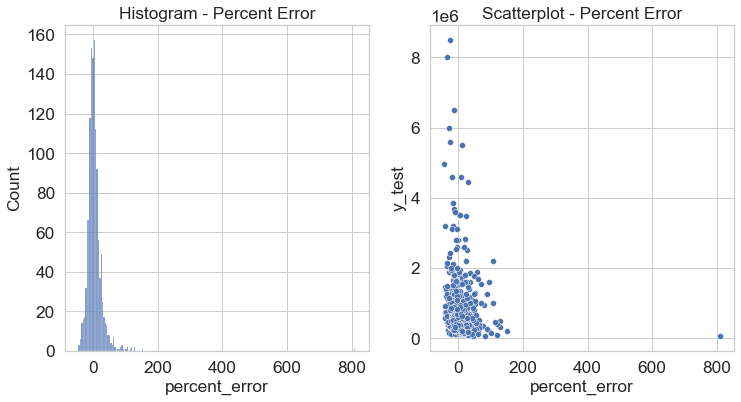

In [377]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(results_test_2.percent_error, bins=200, ax=axes[0]);
axes[0].set_title('Histogram - Percent Error')

sns.scatterplot(x=results_test_2.percent_error, y=results_test_2.y_test, ax=axes[1])
axes[1].set_title('Scatterplot - Percent Error')

In [383]:
# Let's take a look at the house where the percent error is greater then 800
results_test_2[results_test_2['percent_error']>800]

,District,Latitude,Longitude,residual_test,y_test,y_teste_pred,percent_error
431,Aricanduva,NaN,NaN,551242.366044,68000,619242.366044,810.650538


In [384]:
X_test[431:432]

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude
431,0,90,3,2,1,2,1,0,1,0,Aricanduva,NaN,NaN


#### 4.3.2 Ada Boost

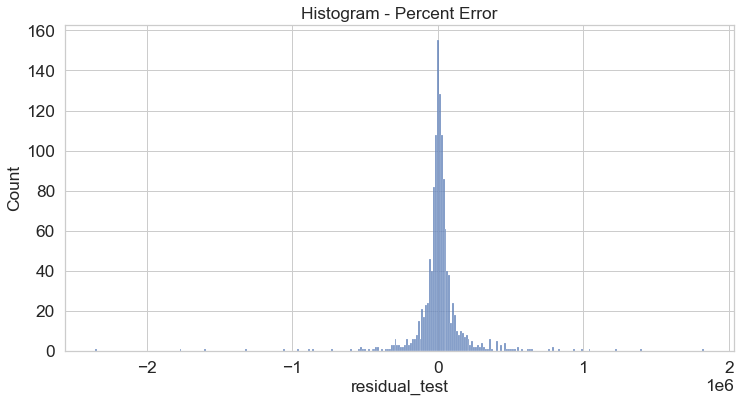

In [379]:
# Create a dataframe to evaluate the predict

results_test_3 = pd.DataFrame({'residual_test':residual_test_3, 'y_test':y_test,'y_teste_pred':y_test_pred_3 })

results_test_3['percent_error'] = (results_test_3['residual_test'] /results_test_3['y_test']) * 100

results_test_3 = pd.concat([X_test[['District', 'Latitude', 'Longitude']], results_test_3], axis=1)

fig = plt.subplots(figsize=(12,6))

sns.histplot(results_test_3.residual_test)
plt.title('Histogram - Percent Error');

Text(0.5, 1.0, 'Scatterplot - Percent Error')

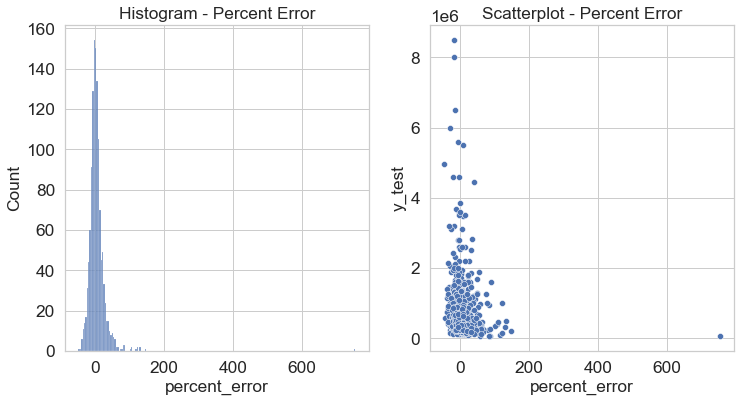

In [380]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(results_test_3.percent_error, bins=200, ax=axes[0]);
axes[0].set_title('Histogram - Percent Error')

sns.scatterplot(x=results_test_3.percent_error, y=results_test_3.y_test, ax=axes[1])
axes[1].set_title('Scatterplot - Percent Error')

### 4.4 Residual per District

As we can see, both the Random Forest and the Ada Boost have had only 6 districts with mean of percent error greater then 20%. 

The 6 districts where this happened were the same in both models: Aricanduva, Rio Pequeno, Saúde, Perdizes, Ipiranga and Butantã.

#### 4.4.1 Random Forest

In [381]:
# Random Forest - Listing the 15 districts where the model performed worsely

temp = results_test_2.groupby(['District']).apply(lambda x: pd.Series(dict(
                                                        qtd_housing          = ((x.District.count()))
                                                        ,mean_percent_error_test   =  ((x.percent_error.mean())) 
                                                        ,median_price   =  ((x.y_test.median())) 
                                                        ))).reset_index() 

temp.sort_values(['mean_percent_error_test'], ascending = [False])[:15].style.background_gradient(cmap='Oranges', axis =0)

,District,qtd_housing,mean_percent_error_test,median_price
2,Aricanduva,16.000000,48.847033,247500.000000
65,Rio Pequeno,6.000000,36.587724,296000.000000
71,Saúde,8.000000,27.206288,529000.000000
58,Perdizes,20.000000,26.556478,850000.000000
32,Ipiranga,12.000000,24.278671,575000.000000
11,Butantã,6.000000,23.355597,602850.000000
67,Santa Cecília,23.000000,19.671751,530000.000000
46,Lapa,6.000000,19.363346,670555.000000
27,Ermelino Matarazzo,16.000000,18.957650,207000.000000
69,Santo Amaro,13.000000,18.606121,630000.000000


#### 4.4.2 Ada Boost

In [382]:
# Ada Boost - Listing the 15 districts where the model performed worsely

temp = results_test_3.groupby(['District']).apply(lambda x: pd.Series(dict(
                                                        qtd_housing          = ((x.District.count()))
                                                        ,mean_percent_error_test   =  ((x.percent_error.mean())) 
                                                        ,median_price   =  ((x.y_test.median())) 
                                                        ))).reset_index() 

temp.sort_values(['mean_percent_error_test'], ascending = [False])[:15].style.background_gradient(cmap='Oranges', axis =0)

,District,qtd_housing,mean_percent_error_test,median_price
2,Aricanduva,16.000000,45.945826,247500.000000
65,Rio Pequeno,6.000000,34.441719,296000.000000
11,Butantã,6.000000,28.186964,602850.000000
58,Perdizes,20.000000,26.718300,850000.000000
32,Ipiranga,12.000000,26.510248,575000.000000
71,Saúde,8.000000,26.119443,529000.000000
27,Ermelino Matarazzo,16.000000,18.848177,207000.000000
69,Santo Amaro,13.000000,18.018141,630000.000000
67,Santa Cecília,23.000000,17.735581,530000.000000
53,Morumbi,7.000000,16.889686,490000.000000


In [7]:
#! pip install streamlit

#! pip install geopy 

#! pip install folium

## 4.5 Deploy


All these notebook was made as a small abstract of our work, you can see more in :

   - [Sprint 1](https://github.com/carlostomeh/Predicao_Preco_Apto_Sao_Paulo/blob/main/sao-paulo-housing__sprint1.ipynb)
   - [Sprint 2](https://github.com/carlostomeh/Predicao_Preco_Apto_Sao_Paulo/blob/main/sao-paulo-housing__sprint2.ipynb)
   - [Sprint 3](https://github.com/carlostomeh/Predicao_Preco_Apto_Sao_Paulo/blob/main/sao-paulo-housing__sprint3.ipynb)
    
    
You can also use this local app running our machine learning solution:

   - [Machine Learning App](https://github.com/carlostomeh/Predicao_Preco_Apto_Sao_Paulo/blob/main/my_app.py)

Or running code below:
    
    

In [5]:
! streamlit run my_app.py

^C


## 5 Appendix 

In our app we use a function to find the most similar apartments to an specified by the user, for this we use an method to find the distance between the features to each sample in our dataset. We use a custom euclidean distance that set diferent weights to each feature. Below we list the features and each weight attributed: 


Features use:

- Size; Weight=1
- Condo; Weight=1
- Total Rooms; Weight=1
- Total Bedrooms; Weight=1
- Price; Weight=2


### Formula

##### **Euclidean distance with weights**

$$D(y, \hat{y}) =  \sqrt {{\sum_{i=0}^{n-1}((y^{(i)}-\hat{y}^{(i)})^2) * {w}^{(i)}}}$$

In [8]:
def busca_apartamentos_similares(X_all, df): 
    
    '''
    Função que retorna dataframe principal para os 10 apartamentos mais próximos segundo o racional da distancia euclideana com pesos
    Recebe como input o dataframe X_all com todos os dados semi limpos e transforma em:
    
    input_transformed = Dataframe normalizado da requisição do usuario
    df_transformed    = Dataframe X_all limpo e normalizado
    
    Retorna um dataframe com os 10 vizinhos mais proximos por distancia euclideana.
    
    '''
    
    pipeline_novo = Pipeline([  ('Criando as colunas', pre_processing_transform_cluster()),
                            ('escalonando', StandardScaler()) ])

    # transform all data
    df_transformed = pipeline_novo.fit_transform(X_all)

    # user data
    input_transformed = pipeline_novo.transform(df)

                

    # Cria lista vazia
    list_distance = []

    # Itera para as colunas de interesse
    for i in range(0, len(df_transformed)):

        # Calcula as distancias para cada feature
        distancia_1 = (df_transformed[i][0] - input_transformed[0][0]) **2
        distancia_2 = (df_transformed[i][1] - input_transformed[0][1]) **2
        distancia_3 = (df_transformed[i][2] - input_transformed[0][2]) **2
        distancia_4 = (df_transformed[i][3] - input_transformed[0][3]) **2
        distancia_5 = (df_transformed[i][4] - input_transformed[0][4]) **2

        # Cria a medidade de distancia - ( Com pesos )
        distance_temp = (distancia_1 + distancia_2 + distancia_3 + distancia_4 + (2*distancia_5))**(0.5)        

        list_distance.append(distance_temp)


    # Cria coluna de distancia ao centroide

    X_all['distancia_centroide'] = list_distance
    mais_proximos = X_all.dropna(subset=['Latitude', 'Longitude']).sort_values(['distancia_centroide'], ascending = [True])[0:10]

    mais_proximos['Total_Rooms']            = mais_proximos['Rooms'] + mais_proximos['Toilets'] + mais_proximos['Suites']
    mais_proximos['Total_Bedrooms']         = mais_proximos['Rooms'] + mais_proximos['Suites']
    
    return mais_proximos;